# Analysis Example: Drug

Statistical Laboratory

Dario Samuele Pishvai-University of Catania

## Request

__Find a model that predicts the use of Drugs based on the patient  avaible features__

Have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications: __Drug A, Drug B, Drug c, Drug x and Drug y.__
The job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.

The target feature are:

__•Drug type__

__•Age__

__•Sex__

__•Blood Pressure Levels (BP)__

__•Cholesterol Levels__

__•Na to Potassium Ration__

## Library 

In [6]:
library(Hmisc)

In [7]:
library(corrplot)

In [3]:
library(ggplot2)

In [4]:
library("NbClust")

In [5]:
library(readr)

# __Feature analysis__

In [36]:
drug200 <- read_csv("C:/Users/acer/OneDrive/Desktop/drug200.csv")
data(drug200)
summary(drug200)

Parsed with column specification:
cols(
  Age = col_double(),
  Sex = col_character(),
  BP = col_character(),
  Cholesterol = col_character(),
  Na_to_K = col_double(),
  Drug = col_character()
)
Warning message in data(drug200):
"data set 'drug200' not found"

      Age            Sex                 BP            Cholesterol       
 Min.   :15.00   Length:200         Length:200         Length:200        
 1st Qu.:31.00   Class :character   Class :character   Class :character  
 Median :45.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :44.31                                                           
 3rd Qu.:58.00                                                           
 Max.   :74.00                                                           
    Na_to_K           Drug          
 Min.   : 6.269   Length:200        
 1st Qu.:10.445   Class :character  
 Median :13.937   Mode  :character  
 Mean   :16.084                     
 3rd Qu.:19.380                     
 Max.   :38.247                     

In [37]:
head(drug200)
names(drug200)
dim(drug200)

Age,Sex,BP,Cholesterol,Na_to_K,Drug
23,F,HIGH,HIGH,25.355,DrugY
47,M,LOW,HIGH,13.093,drugC
47,M,LOW,HIGH,10.114,drugC
28,F,NORMAL,HIGH,7.798,drugX
61,F,LOW,HIGH,18.043,DrugY
22,F,NORMAL,HIGH,8.607,drugX


[1] "Age"         "Sex"         "BP"          "Cholesterol" "Na_to_K"    
[6] "Drug"

[1] 200   6

In [38]:
drug200$Sex[drug200$Sex == "F"]<- 0
drug200$Sex[drug200$Sex == "M"]<- 1
f<- drug200$Sex
f<-strtoi(f)
drug200$Sex<-f

drug200$BP[drug200$BP == "HIGH"]<- 2
drug200$BP[drug200$BP == "NORMAL"]<- 1
drug200$BP[drug200$BP == "LOW"]<- 0
y<- drug200$BP
y<-strtoi(y)
drug200$BP<-y

drug200$Cholesterol[drug200$Cholesterol=="HIGH"]<- 1
drug200$Cholesterol[drug200$Cholesterol=="NORMAL"]<- 0
z<- drug200$Cholesterol
z<-strtoi(z)
drug200$Cholesterol<-z

drug200$Drug[drug200$Drug=="DrugY"]<- 0
drug200$Drug[drug200$Drug=="drugC"]<- 1
drug200$Drug[drug200$Drug=="drugX"]<- 2
drug200$Drug[drug200$Drug=="drugA"]<- 3
drug200$Drug[drug200$Drug=="drugB"]<- 4
k<- drug200$Drug
k<-strtoi(k)
drug200$Drug<-k

summary(drug200)

      Age             Sex             BP         Cholesterol   
 Min.   :15.00   Min.   :0.00   Min.   :0.000   Min.   :0.000  
 1st Qu.:31.00   1st Qu.:0.00   1st Qu.:0.000   1st Qu.:0.000  
 Median :45.00   Median :1.00   Median :1.000   Median :1.000  
 Mean   :44.31   Mean   :0.52   Mean   :1.065   Mean   :0.515  
 3rd Qu.:58.00   3rd Qu.:1.00   3rd Qu.:2.000   3rd Qu.:1.000  
 Max.   :74.00   Max.   :1.00   Max.   :2.000   Max.   :1.000  
    Na_to_K            Drug      
 Min.   : 6.269   Min.   :0.000  
 1st Qu.:10.445   1st Qu.:0.000  
 Median :13.937   Median :1.000  
 Mean   :16.084   Mean   :1.285  
 3rd Qu.:19.380   3rd Qu.:2.000  
 Max.   :38.247   Max.   :4.000  

### __About Age__

In [39]:
density(drug200$Age)
quantile(drug200$Age, 0.25)
quantile(drug200$Age, 0.75)


Call:
	density.default(x = drug200$Age)

Data: drug200$Age (200 obs.);	Bandwidth 'bw' = 5.16

       x                 y            
 Min.   :-0.4813   Min.   :2.501e-05  
 1st Qu.:22.0094   1st Qu.:3.244e-03  
 Median :44.5000   Median :1.433e-02  
 Mean   :44.5000   Mean   :1.110e-02  
 3rd Qu.:66.9906   3rd Qu.:1.727e-02  
 Max.   :89.4813   Max.   :1.882e-02  

25% 
 31

75% 
 58

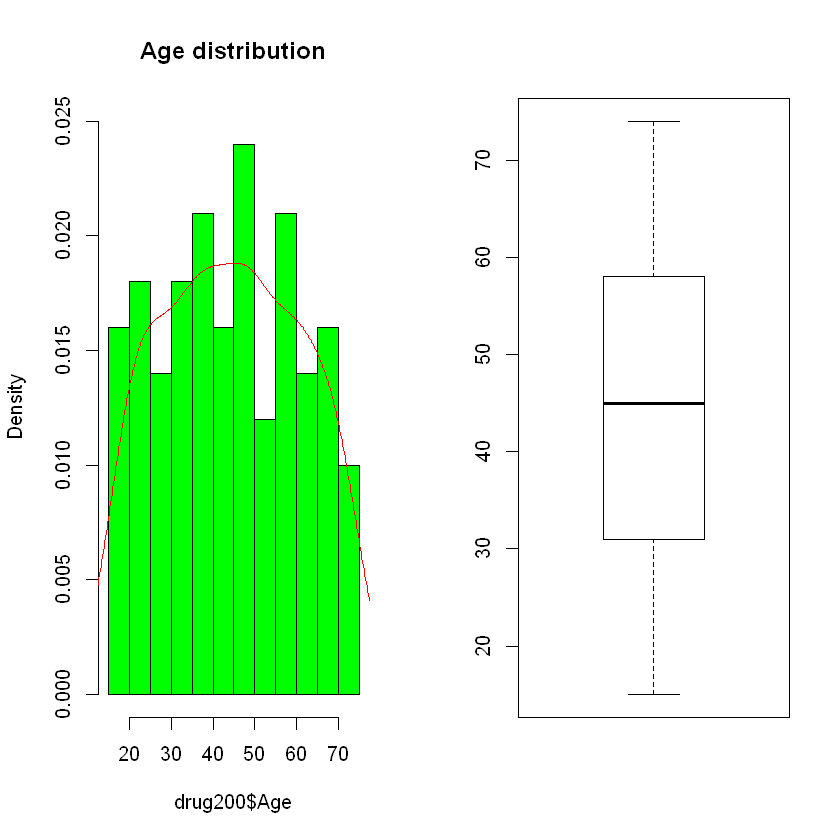

In [40]:
par(mfrow=c(1,2)) 
hist(drug200$Age, main="Age distribution", ylim=c(0,0.025), col="green", freq = FALSE)
lines(density(drug200$Age), col="red")
boxplot(drug200$Age)


How we can see, the Age variable follows the norm distribution, in fact the mean and the median are very close

### __About Sex__

0   1 
 96 104

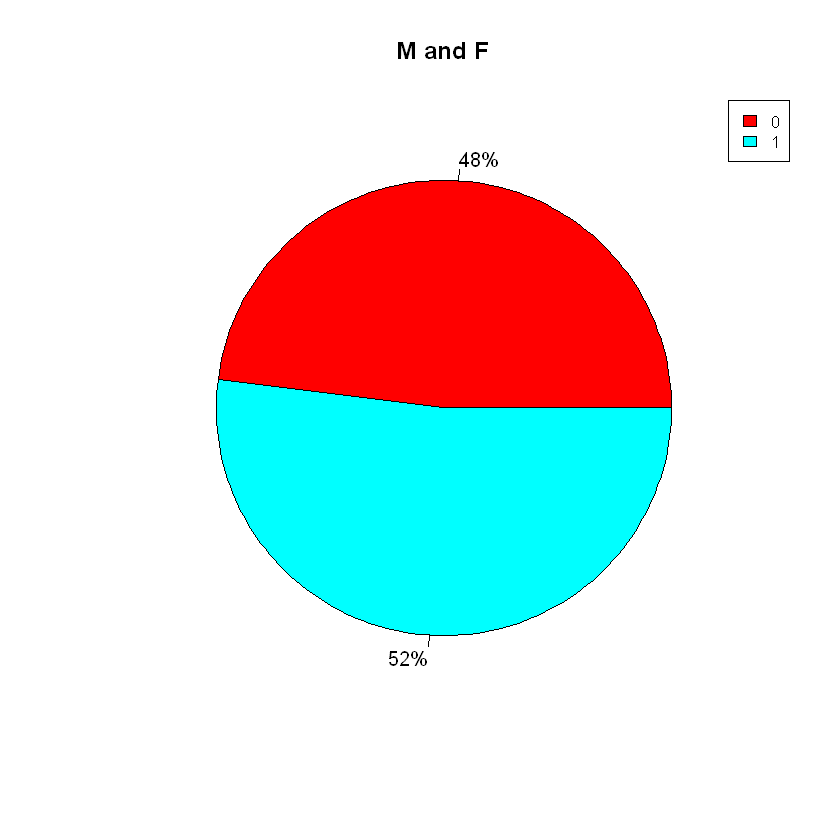

In [13]:
fac_sex<-as.factor(drug200$Sex)
summary(fac_sex)
pie(table(drug200$Sex), labels =paste0( round((table(drug200$Sex)/length(drug200$Sex))*100,2) , "%") ,main = "M and F",col = rainbow(length(table(drug200$Sex))))
legend("topright", names(table(drug200$Sex)), cex = 0.8,
       fill = rainbow(length(table(drug200$Sex))))

### __About Blood Pressure Levels__

0  1  2 
64 59 77

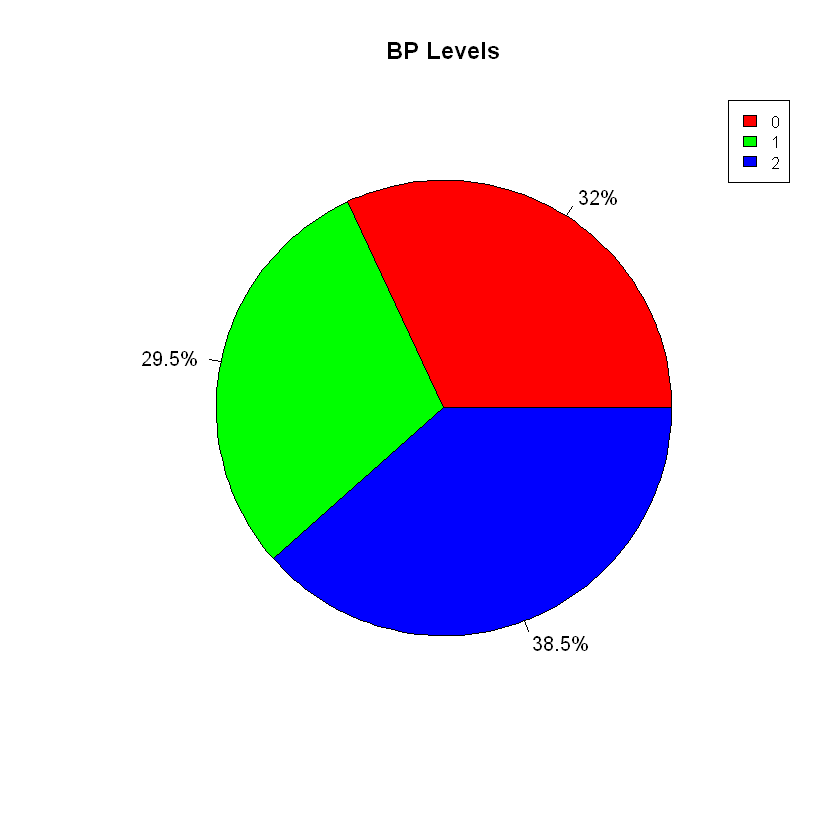

In [14]:
fac_BP<-as.factor(drug200$BP)
summary(fac_BP)
pie(table(drug200$BP), labels =paste0( round((table(drug200$BP)/length(drug200$BP))*100,2) , "%") ,main = "BP Levels",col = rainbow(length(table(drug200$BP))))
legend("topright", names(table(drug200$BP)), cex = 0.8,
       fill = rainbow(length(table(drug200$BP))))

### __About Cholesterol Levels__

0   1 
 97 103

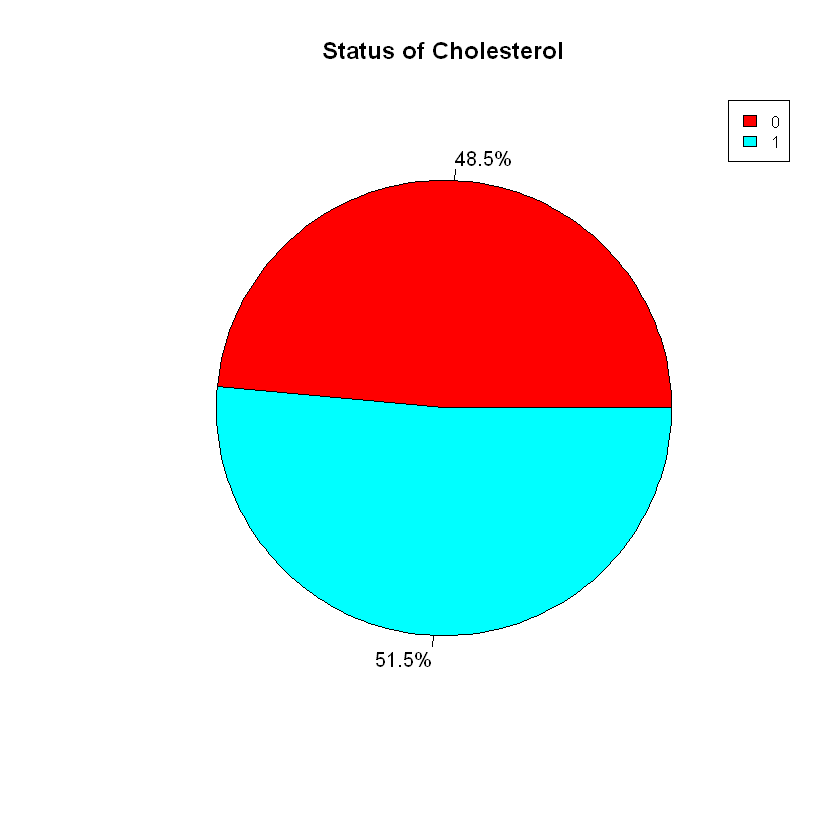

In [15]:
fac_cholesterol<-as.factor(drug200$Cholesterol)
summary(fac_cholesterol)
pie(table(drug200$Cholesterol), labels =paste0( round((table(drug200$Cholesterol)/length(drug200$Cholesterol))*100,2) , "%") ,main = "Status of Cholesterol",col = rainbow(length(table(drug200$Cholesterol))))
legend("topright", names(table(drug200$Cholesterol)), cex = 0.8,
       fill = rainbow(length(table(drug200$Cholesterol))))


### __About Sodium to Potassium Ratio__

In [16]:
density(drug200$Na_to_K)
quantile(drug200$Na_to_K, 0.25)
quantile(drug200$Na_to_K, 0.75)


Call:
	density.default(x = drug200$Na_to_K)

Data: drug200$Na_to_K (200 obs.);	Bandwidth 'bw' = 2.08

       x                  y            
 Min.   : 0.02988   Min.   :1.305e-05  
 1st Qu.:11.14394   1st Qu.:4.158e-03  
 Median :22.25800   Median :1.576e-02  
 Mean   :22.25800   Mean   :2.247e-02  
 3rd Qu.:33.37206   3rd Qu.:3.718e-02  
 Max.   :44.48612   Max.   :7.271e-02  

25% 
10.4455

75% 
19.38

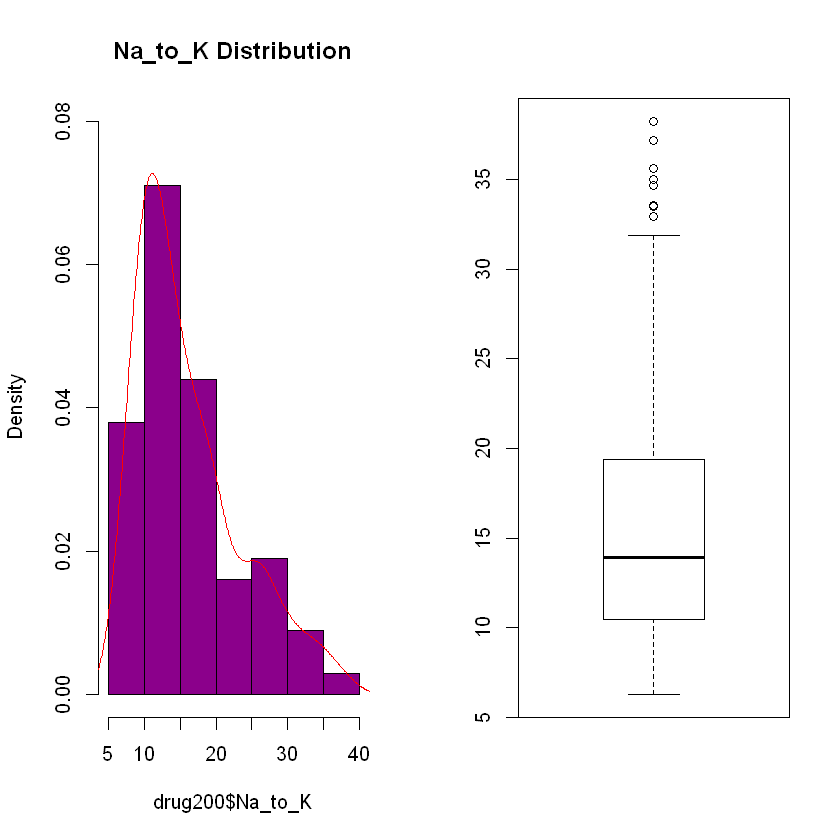

In [17]:
par(mfrow=c(1,2)) 
hist(drug200$Na_to_K, main="Na_to_K Distribution", ylim=c(0,0.08), col="darkmagenta", freq = FALSE)
lines(density(drug200$Na_to_K), col="red")
boxplot(drug200$Na_to_K)

In this case the Na_to_K variable probably follow a lognormal distribution

# Bivariate Analysis

In [31]:
library(corrplot)

In [15]:
unclass(drug200$Drug)

[1] "DrugY" "drugC" "drugC" "drugX" "DrugY" "drugX" "DrugY" "drugC" "DrugY"
 [10] "DrugY" "drugC" "DrugY" "DrugY" "DrugY" "drugX" "DrugY" "drugX" "drugA"
 [19] "drugC" "DrugY" "DrugY" "DrugY" "DrugY" "DrugY" "DrugY" "DrugY" "DrugY"
 [28] "drugX" "DrugY" "DrugY" "drugX" "drugB" "drugX" "DrugY" "drugX" "drugX"
 [37] "drugA" "drugX" "drugX" "drugX" "DrugY" "drugB" "DrugY" "drugX" "drugX"
 [46] "drugX" "drugA" "drugC" "DrugY" "DrugY" "DrugY" "drugX" "DrugY" "DrugY"
 [55] "drugB" "drugC" "drugB" "DrugY" "drugX" "DrugY" "DrugY" "drugA" "DrugY"
 [64] "drugX" "drugB" "DrugY" "drugA" "drugX" "DrugY" "DrugY" "drugB" "DrugY"
 [73] "drugX" "DrugY" "DrugY" "DrugY" "drugA" "DrugY" "drugA" "drugX" "drugB"
 [82] "drugX" "drugC" "drugA" "drugC" "drugB" "drugX" "DrugY" "DrugY" "DrugY"
 [91] "DrugY" "DrugY" "DrugY" "DrugY" "DrugY" "drugX" "DrugY" "DrugY" "DrugY"
[100] "DrugY" "drugA" "drugA" "drugC" "drugX" "DrugY" "drugX" "drugX" "DrugY"
[109] "drugB" "DrugY" "drugA" "drugX" "drugX" "drugX" "drugX" "DrugY" "drugX"
[118] "drugX" "drugA" "DrugY" "DrugY" "DrugY" "DrugY" "DrugY" "drugB" "DrugY"
[127] "DrugY" "drugX" "DrugY" "drugX" "DrugY" "DrugY" "drugX" "DrugY" "DrugY"
[136] "drugX" "drugB" "drugA" "drugB" "drugX" "drugA" "DrugY" "drugB" "DrugY"
[145] "drugA" "drugX" "drugX" "drugA" "drugX" "drugC" "drugA" "drugB" "drugX"
[154] "drugX" "DrugY" "drugC" "drugA" "DrugY" "drugC" "drugX" "drugX" "drugB"
[163] "drugX" "DrugY" "DrugY" "DrugY" "DrugY" "drugX" "DrugY" "drugA" "drugX"
[172] "drugX" "DrugY" "DrugY" "drugA" "DrugY" "drugA" "DrugY" "DrugY" "DrugY"
[181] "DrugY" "drugX" "drugX" "DrugY" "DrugY" "DrugY" "drugB" "drugA" "DrugY"
[190] "DrugY" "DrugY" "drugA" "DrugY" "drugC" "DrugY" "drugC" "drugC" "drugX"
[199] "drugX" "drugX"

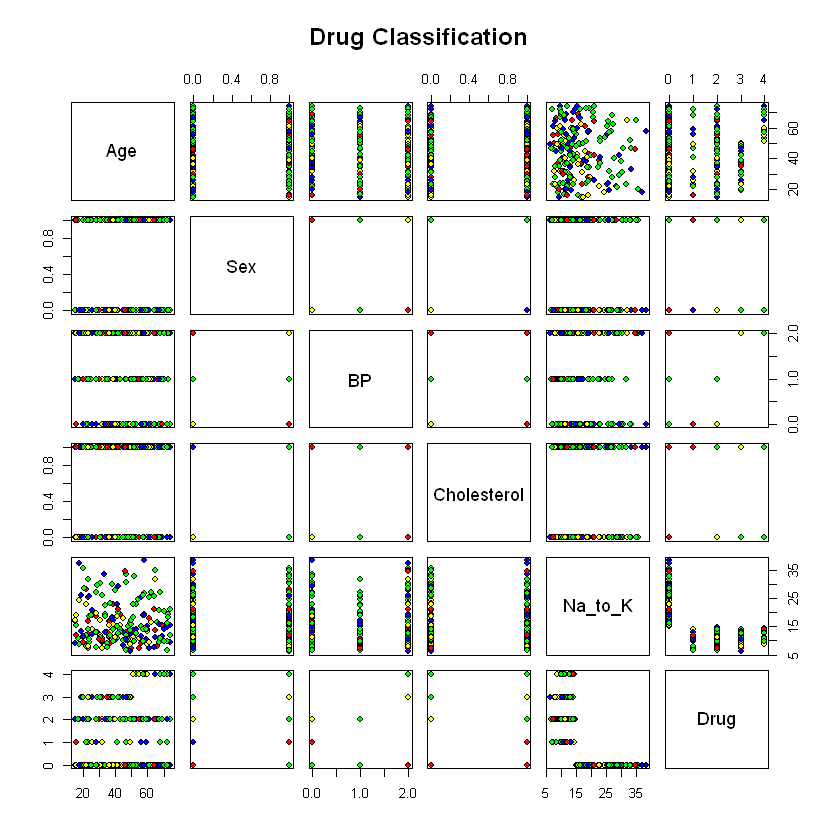

In [18]:
pairs(drug200, main="Drug Classification", pch = 21, bg = c("red", "green", "blue","yellow","orange")[unclass(drug200$Drug)])

In [19]:
cov(drug200)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,273.7143467,0.845427136,-1.67886935,0.565603015,-7.54375153,2.61329146
Sex,0.8454271,0.250854271,-0.01889447,0.002211055,-0.45229869,0.05708543
BP,-1.6788693,-0.018894472,0.70429648,-0.013542714,0.22353113,0.32309045
Cholesterol,0.5656030,0.002211055,-0.01354271,0.251030151,-0.03619575,-0.04198492
Na_to_K,-7.5437515,-0.452298693,0.22353113,-0.036195754,52.18553348,-6.64500827
Drug,2.6132915,0.057085427,0.32309045,-0.041984925,-6.64500827,1.83293970


In [20]:
cor(drug200)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.00000000,0.102027361,-0.12091783,0.068233868,-0.06311950,0.11667155
Sex,0.10202736,1.000000000,-0.04495171,0.008811014,-0.12500849,0.08418610
BP,-0.12091783,-0.044951714,1.00000000,-0.032208091,0.03687102,0.28436247
Cholesterol,0.06823387,0.008811014,-0.03220809,1.000000000,-0.01000045,-0.06189511
Na_to_K,-0.06311950,-0.125008493,0.03687102,-0.010000452,1.00000000,-0.67943259
Drug,0.11667155,0.084186105,0.28436247,-0.061895111,-0.67943259,1.00000000


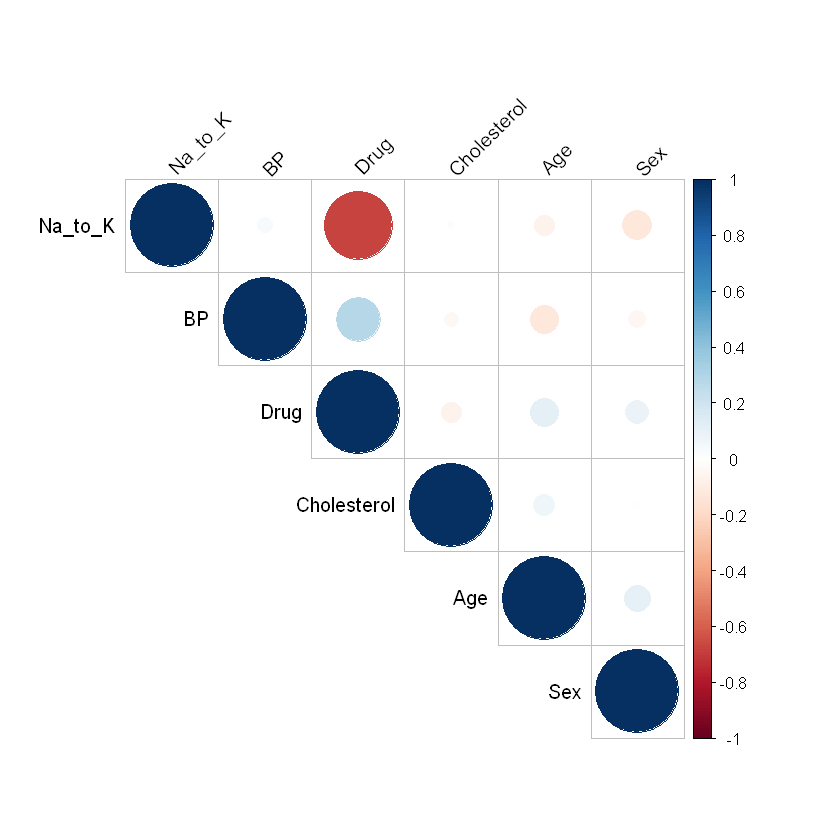

In [21]:
corrplot(cor(drug200), type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)

The corrplot above show us:

•a negative linear correlation between __Drug and Sodium to Potassium Ratio__ around __-0.68__

•a lower negative linear correlation between __Sex and Sodium to Potassium Ratio__ around __-0.125__

•a lower negative linear correlation between __Age and Blood Pressure Levels__ around __-0.121__

•a lower positive linear correlation between __Blood Pressure Levels and Drug__ around __0.28__

•a lower positive linear correlation between __Age and Drug__ around __0.117__

•a lower positive linear correlation between __Age and Sex__ around __0.102__

## Error-bars

The error-bars can display information about the the variability of the data such as the minimum and maximum values, the variance, the standard error or the standard deviation.

I want to plot the average values of Na_to_K, after grouping the data by Drugs type. 

In [22]:
drug200 <- read_csv("C:/Users/acer/OneDrive/Desktop/drug200.csv")
head(drug200)

Parsed with column specification:
cols(
  Age = col_double(),
  Sex = col_character(),
  BP = col_character(),
  Cholesterol = col_character(),
  Na_to_K = col_double(),
  Drug = col_character()
)


Age,Sex,BP,Cholesterol,Na_to_K,Drug
23,F,HIGH,HIGH,25.355,DrugY
47,M,LOW,HIGH,13.093,drugC
47,M,LOW,HIGH,10.114,drugC
28,F,NORMAL,HIGH,7.798,drugX
61,F,LOW,HIGH,18.043,DrugY
22,F,NORMAL,HIGH,8.607,drugX


### __Error Bar for Na to K__

In [23]:
aggregate(drug200[5], list(drug200$Drug), mean)

Group.1,Na_to_K
drugA,10.91878
drugB,11.52438
drugC,10.63375
drugX,10.65056
DrugY,22.37478


In [24]:
NaK_avg <- aggregate(drug200$Na_to_K, list(drug200$Drug), mean)
NaK_avg

Group.1,x
drugA,10.91878
drugB,11.52438
drugC,10.63375
drugX,10.65056
DrugY,22.37478


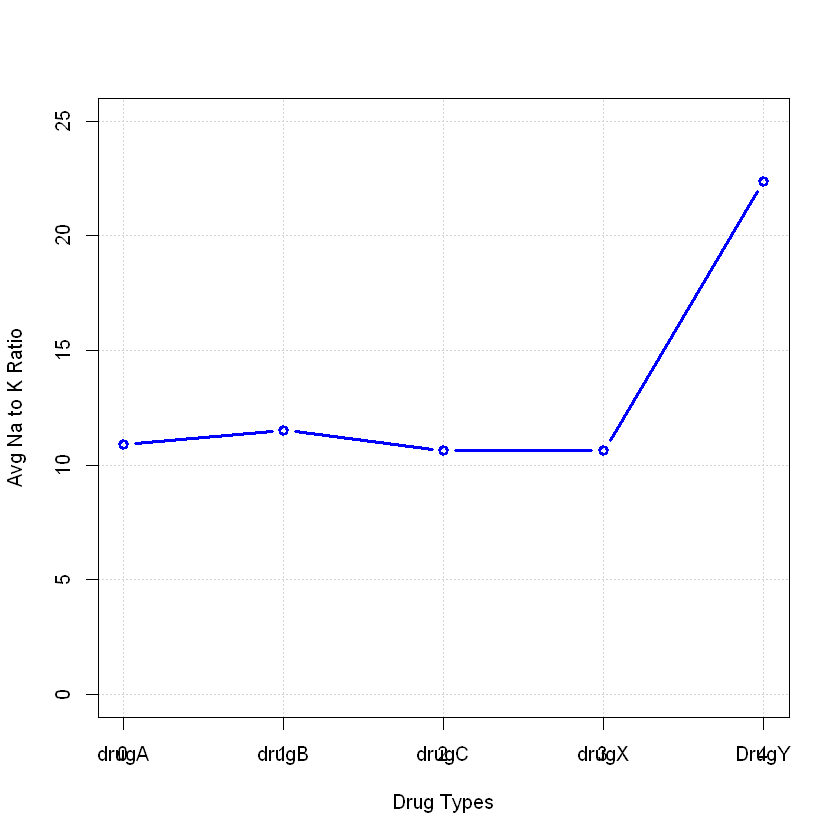

In [25]:
plot(c(0,1,2,3,4), NaK_avg$x, xlab="Drug Types", ylab="Avg Na to K Ratio", type="b", ylim=c(0,25), panel.first=grid(), lwd=3, col = "blue")
axis(side = 1, at=c(0,1,2,3,4), labels = NaK_avg$Group.1)

Than follow the computation of the standard deviation

In [26]:
NaK_std<-aggregate(drug200$Na_to_K, list(drug200$Drug), sd)
NaK_std

Group.1,x
drugA,2.037642
drugB,1.869919
drugC,2.045009
drugX,2.198091
DrugY,6.060195


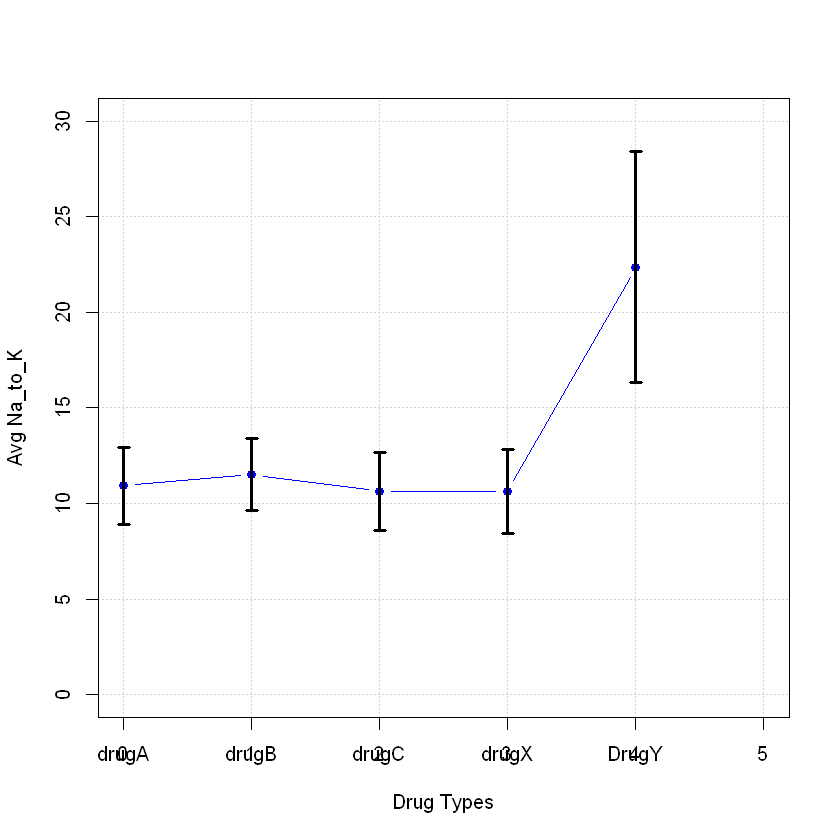

In [27]:
errbar(x = c(0,1,2,3,4),y = NaK_avg$x,yplus= NaK_avg$x + NaK_std$x,yminus=NaK_avg$x - NaK_std$x,xlab="Drug Types",
       ylab="Avg Na_to_K",type = "b",xlim = c(0, 5),ylim = c(0, 30),panel.first = grid(),lwd=3,col = "blue"    )
     
axis(side = 1,at=c(0,1,2,3,4),labels = NaK_std$Group.1)

### __Error Bar for Age__

In [28]:
Age_avg<-aggregate(drug200[1], list(drug200$Drug), mean)
Age_avg

Group.1,Age
drugA,35.86957
drugB,62.50000
drugC,42.50000
drugX,44.01852
DrugY,43.74725


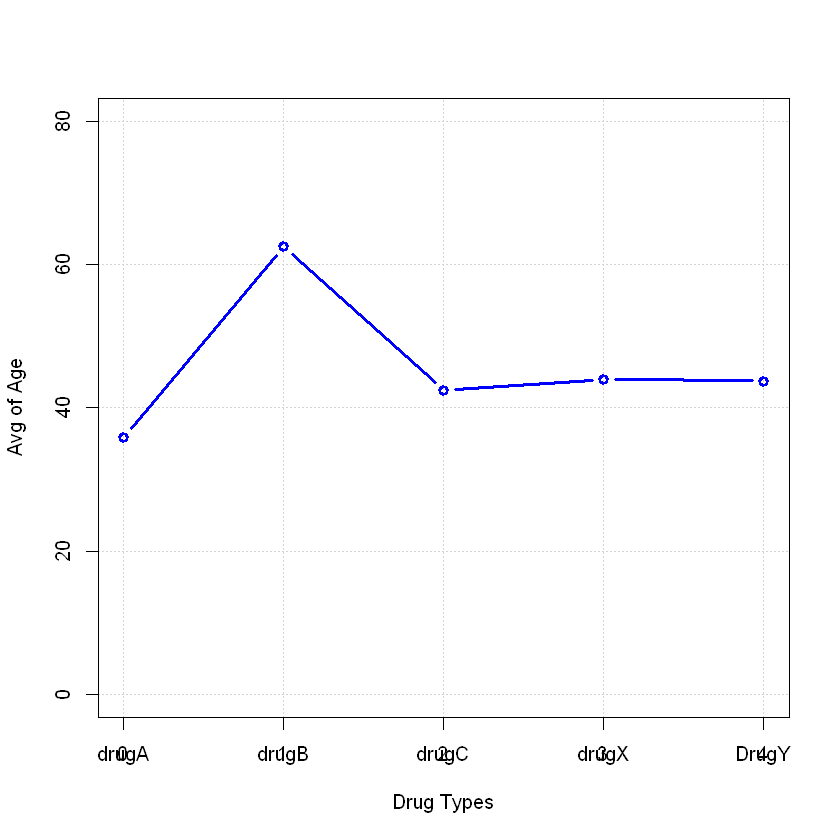

In [29]:
plot(c(0,1,2,3,4), Age_avg$Age, xlab="Drug Types", ylab="Avg of Age", type="b", ylim=c(0,80), panel.first=grid(), lwd=3, col = "blue")
axis(side = 1, at=c(0,1,2,3,4), labels = Age_avg$Group.1)

Than follow the computation of the standard deviation

In [30]:
Age_std<-aggregate(drug200$Age, list(drug200$Drug), sd)
Age_std

Group.1,x
drugA,9.696786
drugB,7.127412
drugC,16.725230
drugX,16.435685
DrugY,17.031731


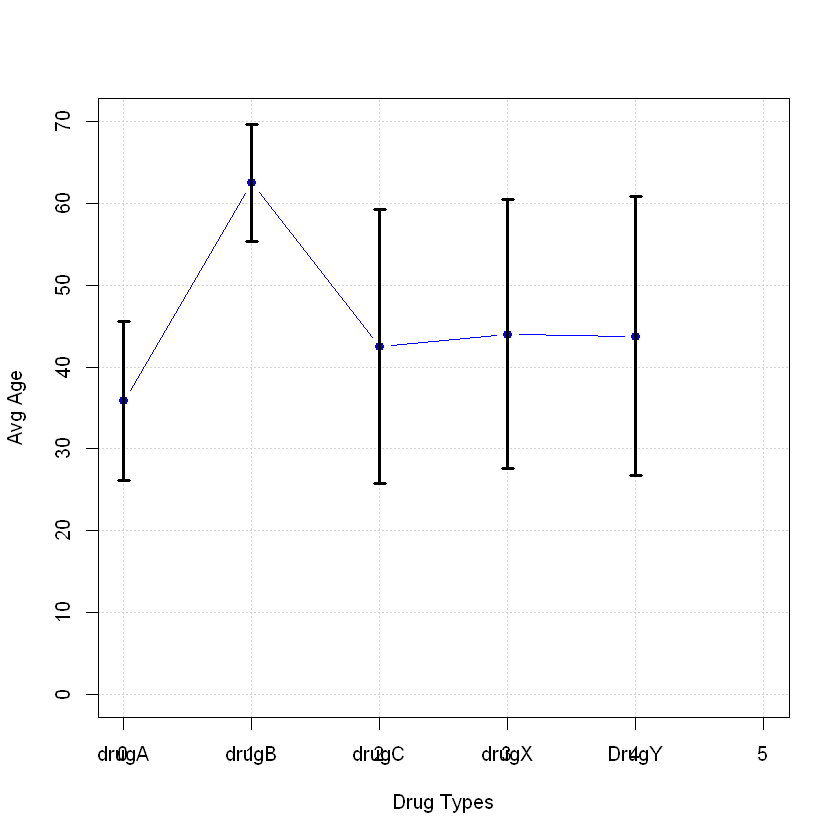

In [31]:
errbar(x = c(0,1,2,3,4),y = Age_avg$Age,yplus= Age_avg$Age + Age_std$x,yminus=Age_avg$Age - Age_std$x,
       xlab="Drug Types",ylab="Avg Age",type = "b",xlim = c(0, 5),ylim = c(0, 70),
       panel.first = grid(),lwd=3,col = "blue"    )
     
axis(side = 1,at=c(0,1,2,3,4),labels = Age_std$Group.1)

## Study of categorical variable

### Blood Pressure Levels and Drugs

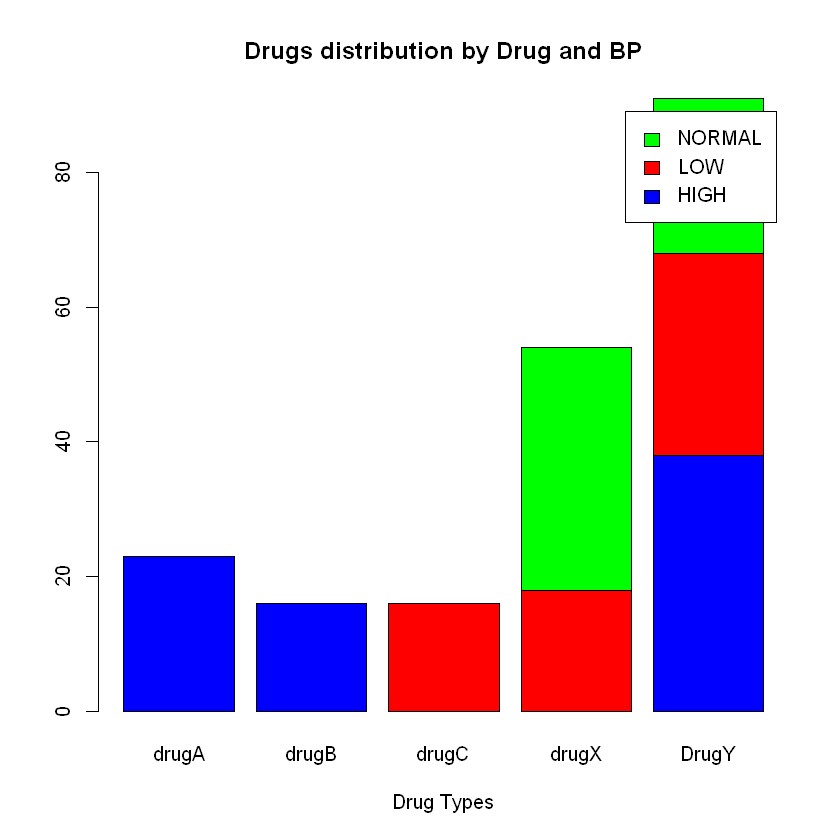

In [32]:
counts <- table(drug200$BP, drug200$Drug)
barplot(counts, main="Drugs distribution by Drug and BP", xlab="Drug Types", 
        col=c("blue","red","green"), legend = rownames(counts))

### Cholesterol and Drugs

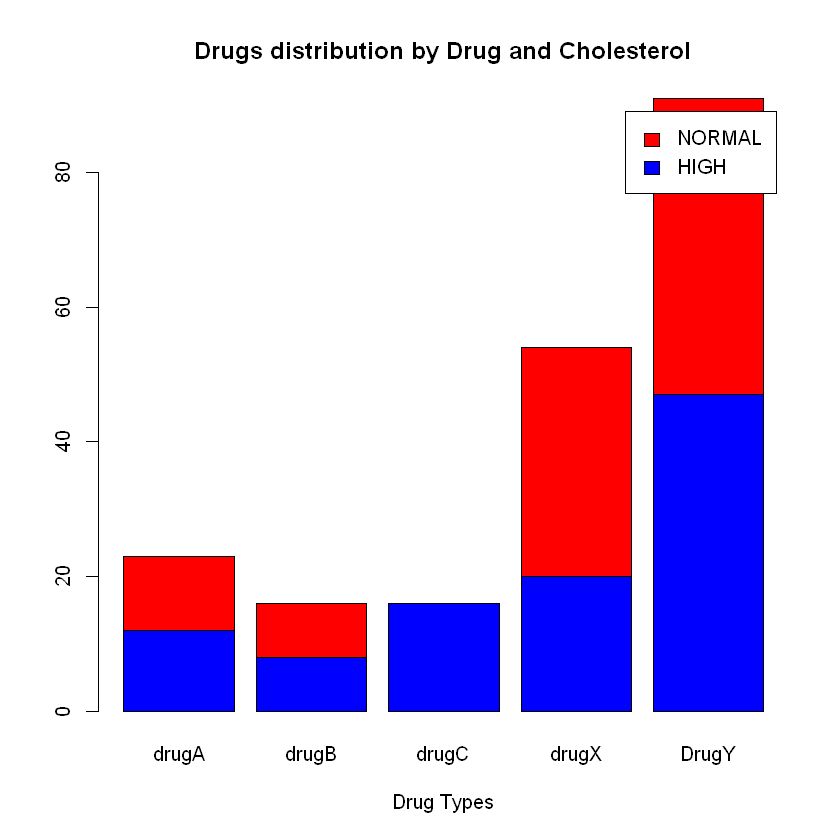

In [33]:
counts <- table(drug200$Cholesterol, drug200$Drug)
barplot(counts, main="Drugs distribution by Drug and Cholesterol", xlab="Drug Types", 
        col=c("blue","red"), legend = rownames(counts))

### Sex and Drugs

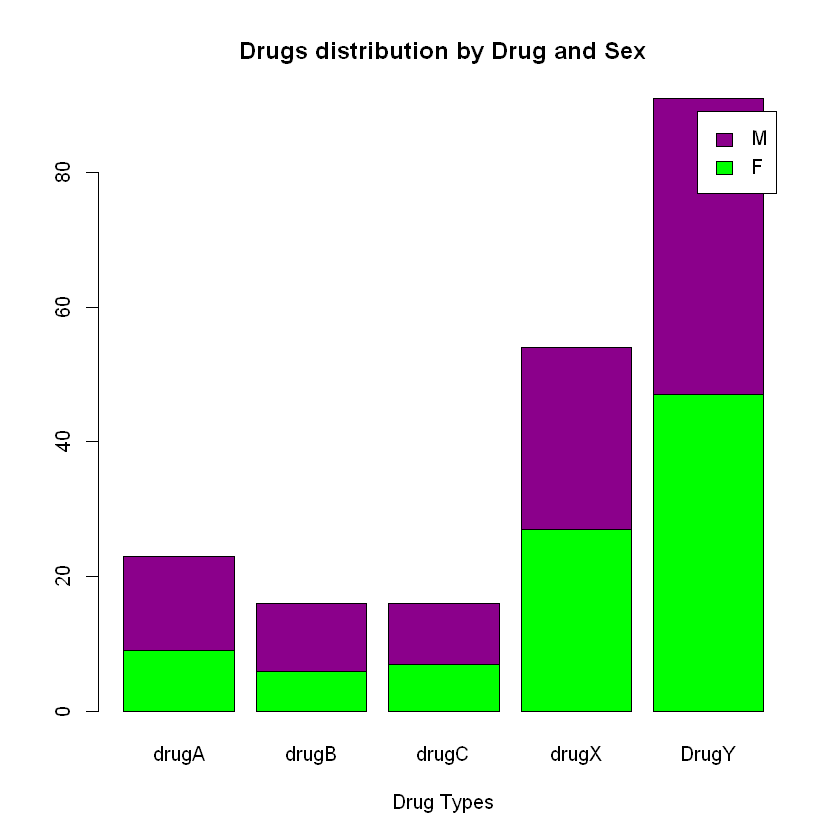

In [34]:
counts <- table(drug200$Sex, drug200$Drug)
barplot(counts, main="Drugs distribution by Drug and Sex", xlab="Drug Types", 
        col=c("green","darkmagenta"), legend = rownames(counts))

## Regression Analysis and Prediction

### Regression btw Drug type and Na_to_K

In [41]:
drug_Na_to_K = lm(drug200$Drug~drug200$Na_to_K)
summary(drug_Na_to_K)
coef(drug_Na_to_K)


Call:
lm(formula = drug200$Drug ~ drug200$Na_to_K)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47118 -0.87158 -0.08126  0.53187  2.48001 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.333107   0.172240   19.35   <2e-16 ***
drug200$Na_to_K -0.127334   0.009773  -13.03   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9959 on 198 degrees of freedom
Multiple R-squared:  0.4616,	Adjusted R-squared:  0.4589 
F-statistic: 169.8 on 1 and 198 DF,  p-value: < 2.2e-16


(Intercept) drug200$Na_to_K 
      3.3331066      -0.1273343

In [42]:
confint(drug_Na_to_K)

,2.5 %,97.5 %
(Intercept),2.9934473,3.6727659
drug200$Na_to_K,-0.1466059,-0.1080627


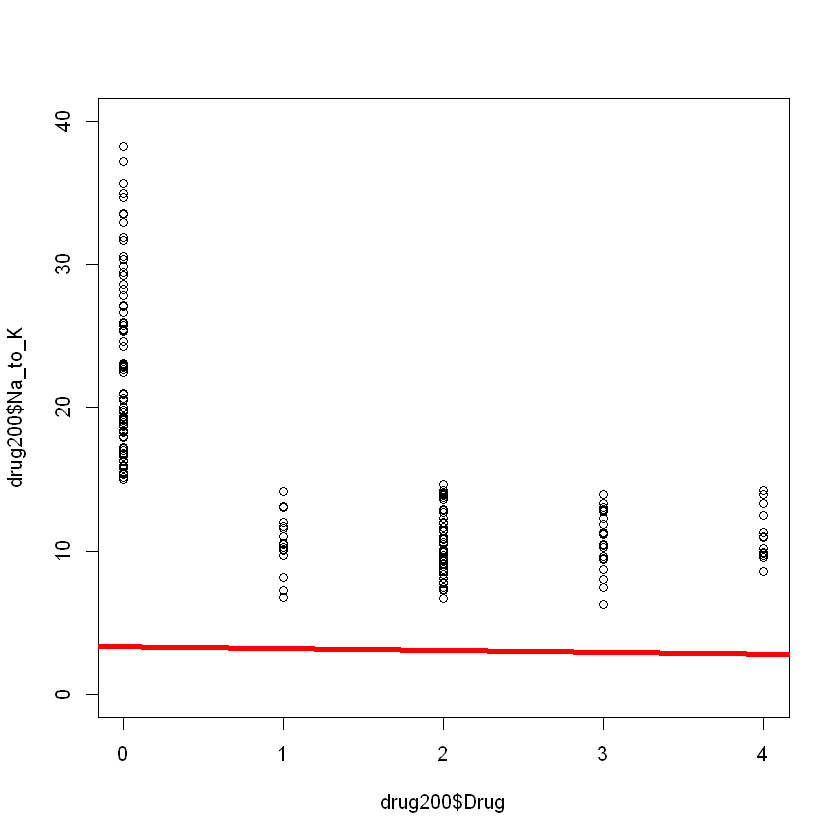

In [43]:
plot(drug200$Drug,drug200$Na_to_K,xlim=c(0,4),ylim=c(0,40))
abline(drug_Na_to_K,col="red",lwd=4)

We can see that the linear regression is useless for our study. Than we try to find a model that best fit our data

In [44]:
train <- drug200[1:150,]
test <- drug200[151:199,]

In [45]:
drug_model=glm(Drug~Na_to_K,data=train)

In [46]:
summary(drug_model)


Call:
glm(formula = Drug ~ Na_to_K, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4281  -0.8406  -0.1062   0.4690   2.4727  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.34827    0.20077   16.68   <2e-16 ***
Na_to_K     -0.12788    0.01136  -11.26   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1.014443)

    Null deviance: 278.67  on 149  degrees of freedom
Residual deviance: 150.14  on 148  degrees of freedom
AIC: 431.82

Number of Fisher Scoring iterations: 2


In [47]:
anova(drug_model, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,149,278.6733,NA
Na_to_K,1,128.5358,148,150.1376,2.154633e-29


While no exact equivalent to the R2 of linear regression exists, the McFadden R2 index can be used to assess the model fit.

In [50]:
library(pscl)

In [51]:
pR2(drug_model)

fitting null model for pseudo-r2


llh      llhNull           G2     McFadden         r2ML         r2CU 
-212.9095300 -259.2961515   92.7732429    0.1788944    0.4612417    0.4762509

In [52]:
fitted.results <- predict(drug_model,newdata=subset(test,select=c(1,2,3,4,5,6)),type='response')
fitted.results <- ifelse(fitted.results > 0.5,1,0)

In [53]:
misClasificError <- mean(fitted.results != test$Drug)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.285714285714286"


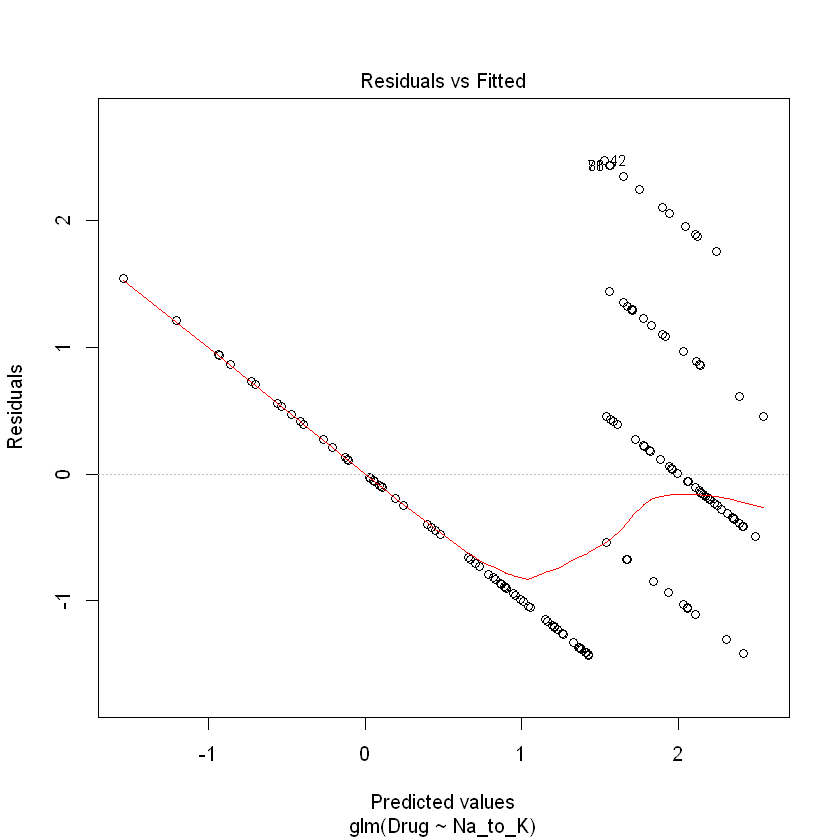

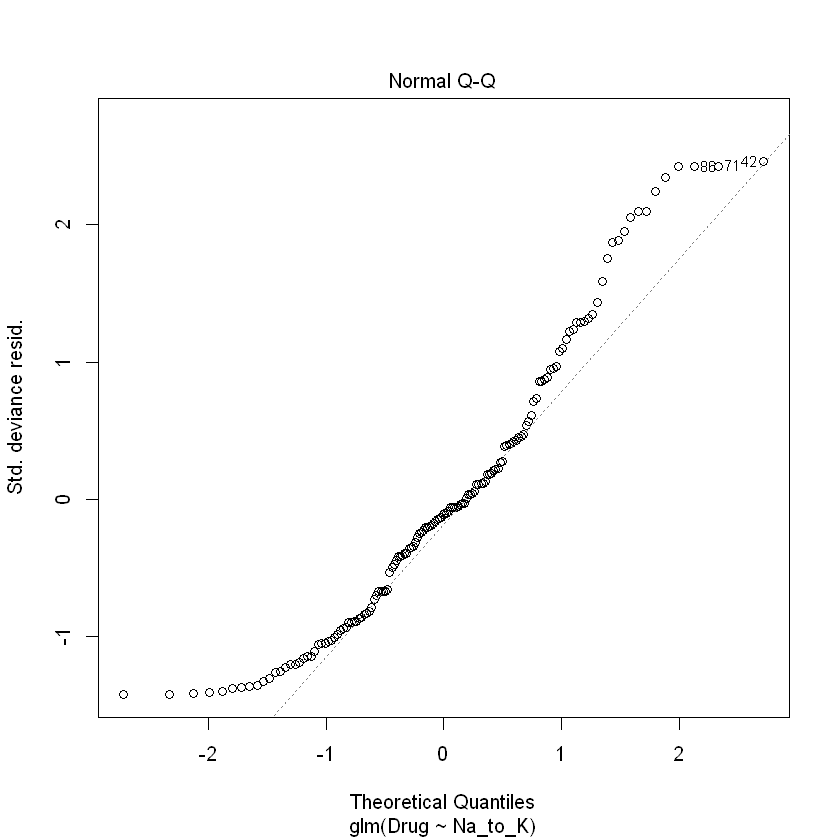

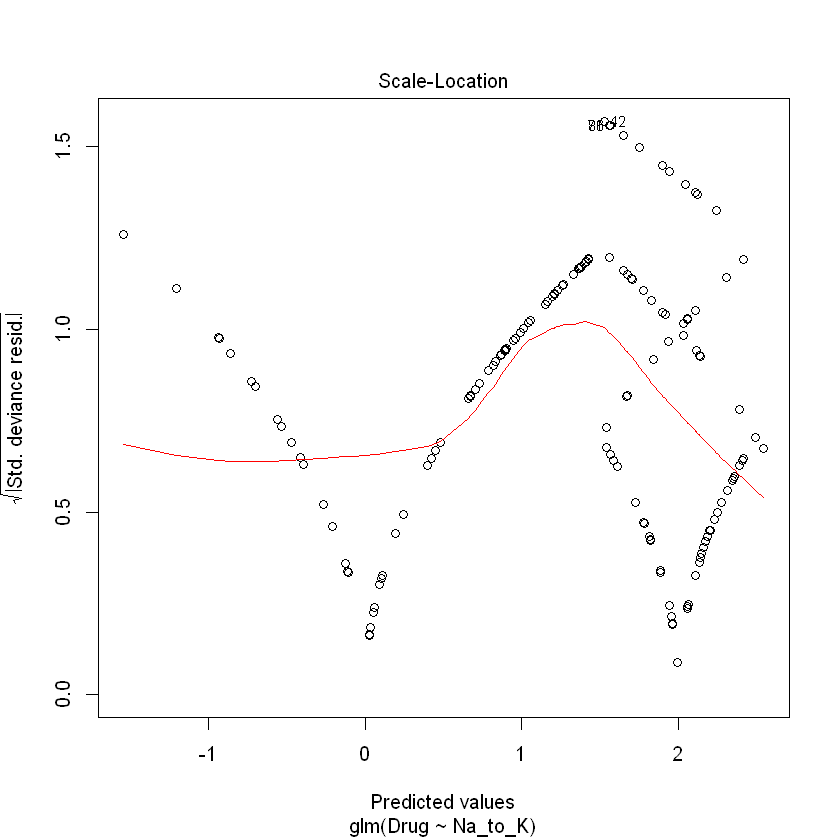

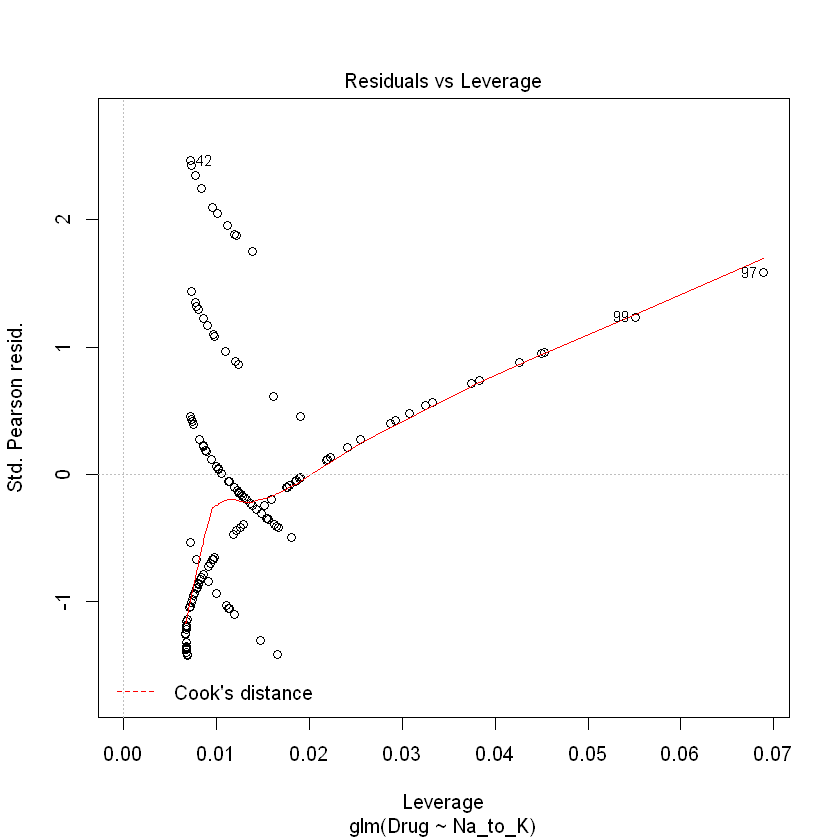

In [174]:
plot(drug_model)

### Regression btw Drug type and BP levels

In [54]:
drug_BP = lm(drug200$Drug~drug200$BP)
summary(drug_BP)
coef(drug_BP)


Call:
lm(formula = drug200$Drug ~ drug200$BP)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7139 -1.2552  0.2036  1.2036  2.2861 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.7964     0.1489   5.349 2.43e-07 ***
drug200$BP    0.4587     0.1099   4.174 4.49e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.301 on 198 degrees of freedom
Multiple R-squared:  0.08086,	Adjusted R-squared:  0.07622 
F-statistic: 17.42 on 1 and 198 DF,  p-value: 4.487e-05


(Intercept)  drug200$BP 
  0.7964397   0.4587421

In [55]:
confint(drug_BP)

,2.5 %,97.5 %
(Intercept),0.5028215,1.090058
drug200$BP,0.2419892,0.675495


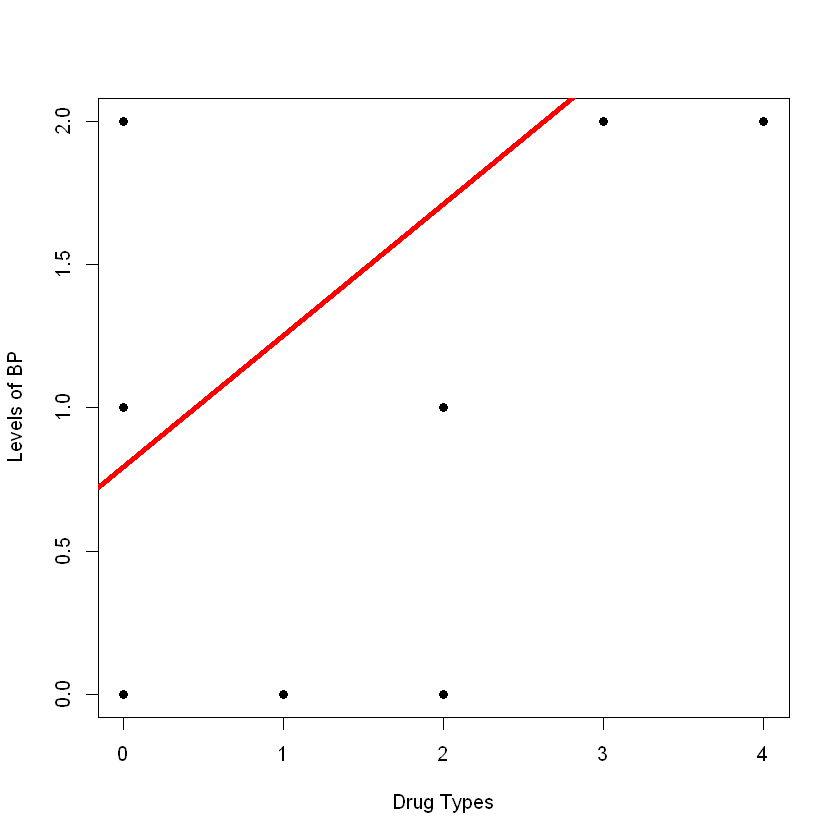

In [56]:
plot(drug200$Drug,drug200$BP,pch=16,cex=1,ylab="Levels of BP",xlab="Drug Types")
abline(drug_BP,col="red",lwd=4)

### Regression btw Drug type and Age

In [57]:
drug_Age = lm(drug200$Drug~drug200$Age)
summary(drug_Age)
coef(drug_Age)


Call:
lm(formula = drug200$Drug ~ drug200$Age)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5684 -1.2462 -0.2820  0.8708  2.6512 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 0.861902   0.273129   3.156  0.00185 **
drug200$Age 0.009548   0.005776   1.653  0.09991 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.348 on 198 degrees of freedom
Multiple R-squared:  0.01361,	Adjusted R-squared:  0.00863 
F-statistic: 2.732 on 1 and 198 DF,  p-value: 0.09991


(Intercept) drug200$Age 
0.861901933 0.009547514

In [58]:
confint(drug_Age)

,2.5 %,97.5 %
(Intercept),0.32328596,1.40051791
drug200$Age,-0.00184258,0.02093761


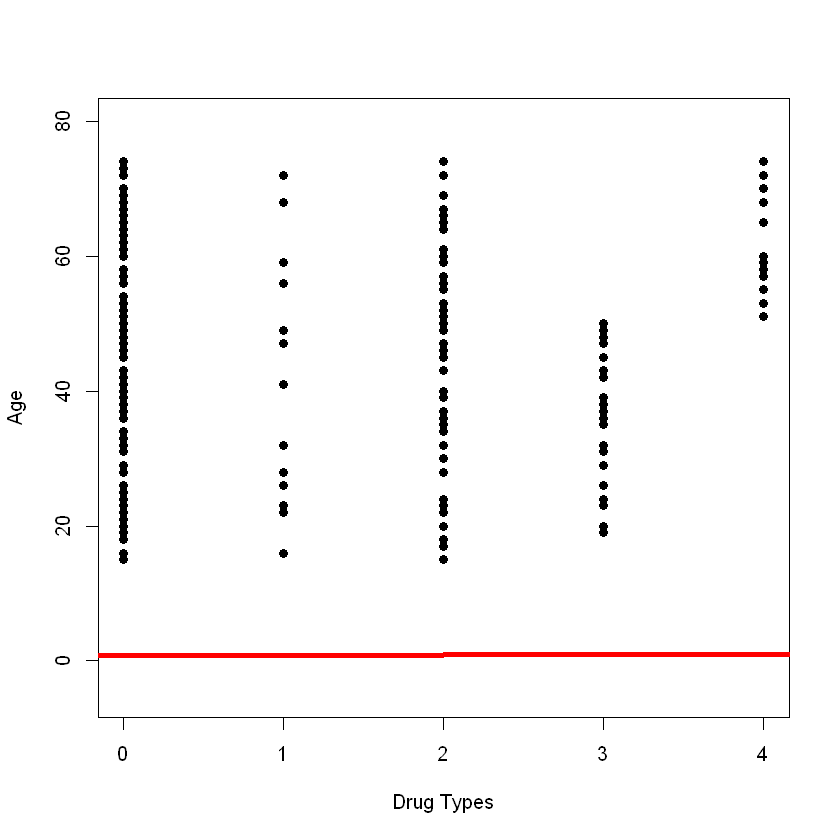

In [59]:
plot(drug200$Drug,drug200$Age,ylim=c(-5,80),pch=16,cex=1,ylab="Age",xlab="Drug Types")

abline(lm(drug200$Drug~drug200$Age),col="red",lwd=4)

## Multiple Linear Regression

Drug200 data set contains six variables, to perform a regression using all of the predictor we can use the following procedure.

In [60]:
drug_all=lm(drug200$Drug~., data=drug200)
summary(drug_all)


Call:
lm(formula = drug200$Drug ~ ., data = drug200)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.23151 -0.55787 -0.02926  0.59070  2.06892 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.461959   0.271460   9.069  < 2e-16 ***
Age          0.009551   0.003892   2.454    0.015 *  
Sex          0.004784   0.128259   0.037    0.970    
BP           0.518897   0.076215   6.808  1.2e-10 ***
Cholesterol -0.179312   0.126910  -1.413    0.159    
Na_to_K     -0.128259   0.008863 -14.471  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8946 on 194 degrees of freedom
Multiple R-squared:  0.5743,	Adjusted R-squared:  0.5633 
F-statistic: 52.35 on 5 and 194 DF,  p-value: < 2.2e-16


In [61]:
summary(drug_all)$r.squared
summary(drug_all)$sigma
summary(drug_all)$fstatistic

[1] 0.5743207

[1] 0.894625

value     numdf     dendf 
 52.34844   5.00000 194.00000

__In the above regression output, the predictors 'Sex' and 'Cholesterol' have high p-values.
So we may want to run a regression excluding these predictors.__

In [62]:
drug_adj=lm(drug200$Drug~.-Sex-Cholesterol, data=drug200)
summary(drug_adj)


Call:
lm(formula = drug200$Drug ~ . - Sex - Cholesterol, data = drug200)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.12911 -0.52996  0.01485  0.61746  1.98627 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.384121   0.255932   9.315  < 2e-16 ***
Age          0.009211   0.003868   2.381   0.0182 *  
BP           0.521399   0.076159   6.846 9.51e-11 ***
Na_to_K     -0.128236   0.008800 -14.572  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8946 on 196 degrees of freedom
Multiple R-squared:  0.5699,	Adjusted R-squared:  0.5634 
F-statistic: 86.58 on 3 and 196 DF,  p-value: < 2.2e-16


In [63]:
names(summary(drug_adj))
summary(drug_adj)$r.squared
summary(drug_adj)$sigma
summary(drug_adj)$fstatistic

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

[1] 0.5699375

[1] 0.8946196

value     numdf     dendf 
 86.58256   3.00000 196.00000

In [64]:
coef(drug_adj)
confint(drug_adj)

(Intercept)          Age           BP      Na_to_K 
 2.384121324  0.009211325  0.521399486 -0.128236101

,2.5 %,97.5 %
(Intercept),1.879387854,2.88885479
Age,0.001582456,0.01684019
BP,0.371203021,0.67159595
Na_to_K,-0.145591352,-0.11088085


## PCA and Cluster Analysis

In [65]:
drug200_scaled= scale(drug200)
pca_drug200= prcomp(drug200_scaled)
names(pca_drug200)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [66]:
pca_drug200$rotation

,PC1,PC2,PC3,PC4,PC5,PC6
Age,0.1503695,-0.57149028,-0.054066118,0.11558707,0.78869205,-0.11166565
Sex,0.1902822,-0.40062623,0.328692635,-0.81348473,-0.18156997,0.02296494
BP,0.1930423,0.61934280,-0.286355881,-0.47773293,0.41912134,-0.30538178
Cholesterol,-0.0401098,-0.31973056,-0.896447011,-0.15571705,-0.25389272,0.06194369
Na_to_K,-0.6487600,0.09659484,-0.007891596,-0.25613522,0.32038940,0.63361106
Drug,0.6938429,0.13324333,-0.057955106,0.08246463,0.04715538,0.69888867


In [67]:
head(pca_drug200$x)

PC1,PC2,PC3,PC4,PC5,PC6
-1.70614648,1.5302430,-1.4135250,-0.3942936,-0.2400240,-0.01047605
0.04555564,-1.6402093,-0.1826727,-0.2166260,-0.9662617,0.04188228
0.31308997,-1.6800429,-0.1794183,-0.1110015,-1.0983832,-0.21940496
0.71099437,0.5816050,-1.1550845,0.9542235,-1.2100914,-0.18781907
-1.16415121,-1.3561529,-0.8472892,1.2689623,0.2483672,-0.18051799
0.58380735,0.7996805,-1.1363605,0.8836202,-1.4602403,-0.07636499


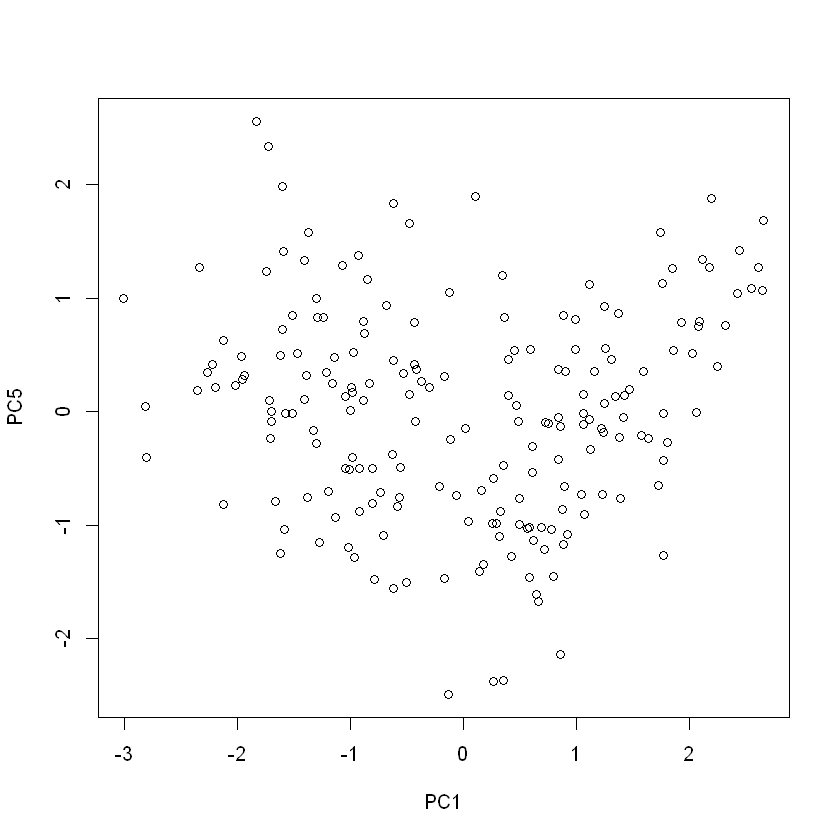

In [68]:
pca_scores= data.frame(pca_drug200$x[,c(1,5)])
plot(pca_scores)

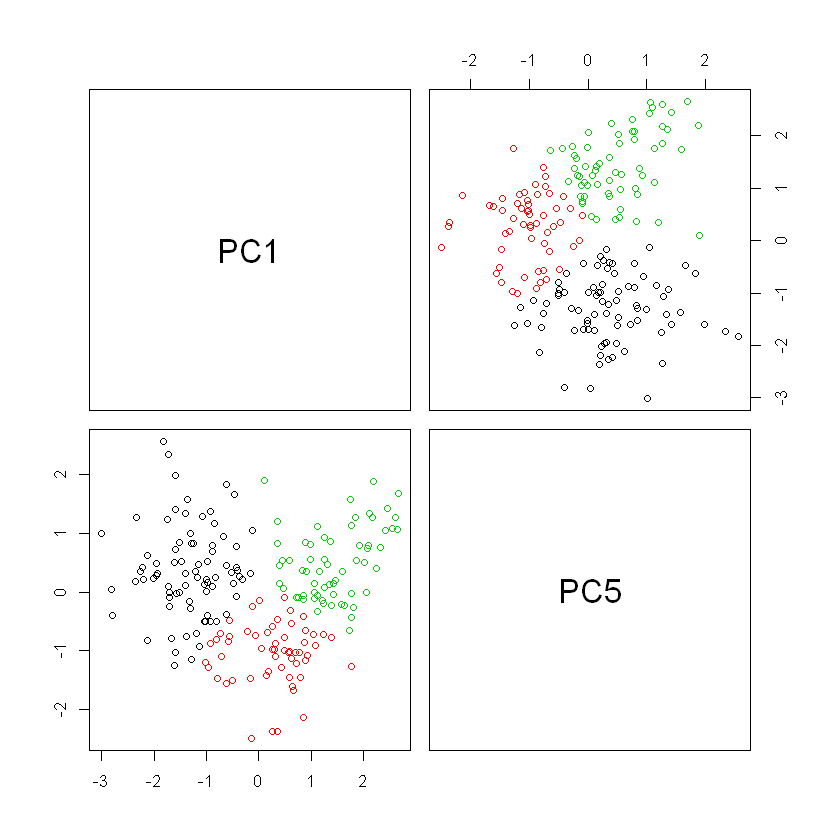

In [69]:
data= pca_drug200$x[,c(1,5)]
k=3
fit<-kmeans(data, k)
pairs(data, col=c(1:k)[fit$cluster])


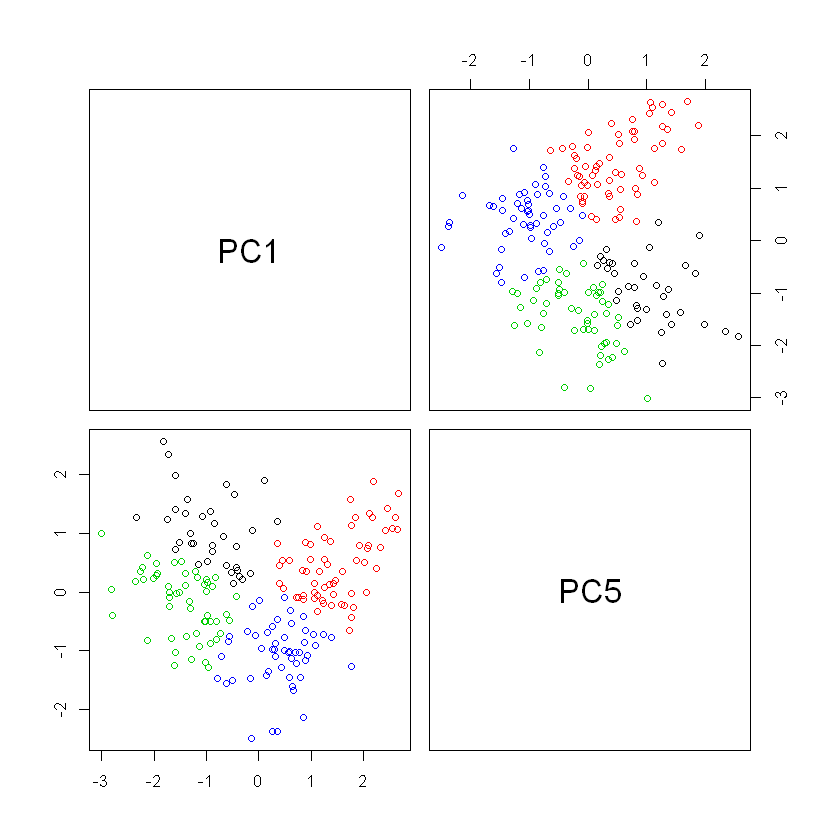

In [70]:
k=4
fit<-kmeans(data, k)
pairs(data, col=c(1:k)[fit$cluster])

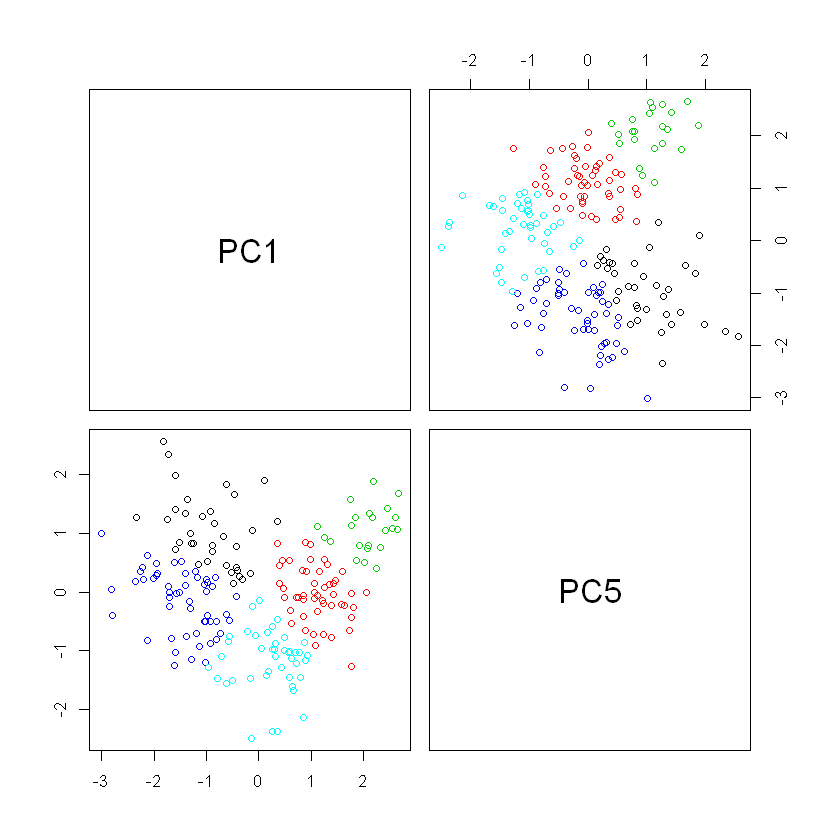

In [71]:
k=5
fit<-kmeans(data, k)
pairs(data, col=c(1:k)[fit$cluster])

__One of best ways to find the right number of clusters is the Elbow method__

In [72]:
library("NbClust")

fviz_nbclust(data, kmeans, method = "wss")

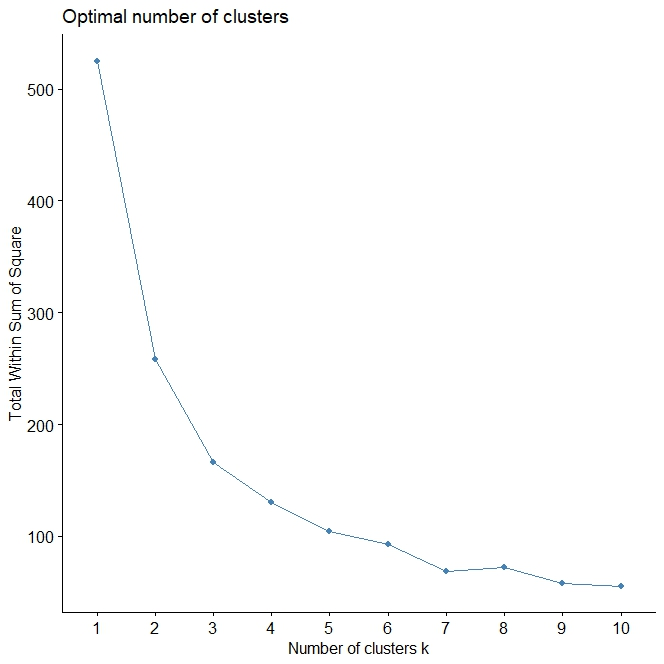

According to the Elbow Method the best number of cluster is 3

# Conclusion

In conclusion, is possible to predict the type of Drug that can be used based on the feature:

•__Drug Y__ are usefull for __high level of Sodium to Potassium ratio__

•__Drug C__ is usefull for __low blood pressure__

•__Drug A__ and __Drug B__ are usefull for __high blood pressure__, but people under 50 take a and people over 50 take b

•The most usefull drug, that can help a __generical patient__ is the __Drug Y__